<a href="https://colab.research.google.com/github/not-sid-29/CancerNet/blob/main/CancerNet_Gradio_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CancerNet Gradio Demo app:

In [ ]:
!pip install --q gradio
!pip install --q fastai
!pip install --q timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.7 MB/s et

In [ ]:
#|default_exp app

In [ ]:
#|export
import timm
from fastai.vision.all import *
import gradio as gr

In [ ]:
#|export

vit_patch16 = load_learner('vit_patch16_small.pkl')
vit_patch32 = load_learner('vit_patch32_small.pkl')

In [ ]:
def ensemble_prediction(image):
  try:
    img = PILImage.create(image)

  except FileNotFoundError:
    print("Image was not found at given destination")
  except IOError:
    print("Image could not be opened")

  #Resizing the image into 224x224:
  img.thumbnail((224, 224))

  try:
    #Predicting using the 2 models:
    vit_patch16_preds = vit_patch16.predict(img)
    vit_patch32_preds = vit_patch32.predict(img)

  except Exception as e:
    print("Error encountered while predicting the image")
    return None


  #Creating a label dict from the vocabulary of any of the one models
  labels = vit_patch16.dls.vocab


  avg_pred = (vit_patch16_preds[2] + vit_patch32_preds[2])/2

  predicted_idx = torch.argmax(avg_pred).item()
  predicted_label = labels[predicted_idx]
  predicted_proba = {label:float(proba) for label, proba in zip(labels, avg_pred)}
  probablity = '\n'.join([f"{label} : {prob:.4f}" for label, prob in predicted_proba.items()])
  return predicted_label, probablity


<Axes: >

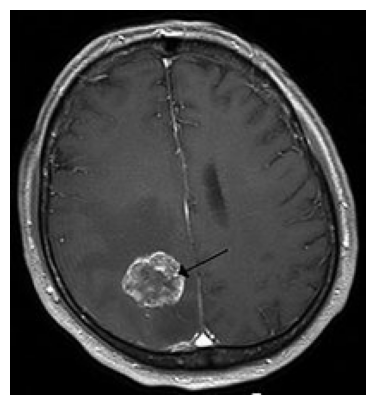

In [ ]:
image = PILImage.create("/content/brain_tumor.jpg")
image.thumbnail((224, 224))
image.show()

In [ ]:
%%time
ensemble_prediction(image)

CPU times: user 596 ms, sys: 26.7 ms, total: 623 ms
Wall time: 959 ms


('brain_glioma',
 'all_benign : 0.0003\nall_early : 0.0000\nall_pre : 0.0000\nall_pro : 0.0000\nbrain_glioma : 0.9644\nbrain_menin : 0.0001\nbrain_tumor : 0.0348\nbreast_benign : 0.0000\nbreast_malignant : 0.0000\ncervix_dyk : 0.0000\ncervix_koc : 0.0000\ncervix_mep : 0.0000\ncervix_pab : 0.0000\ncervix_sfi : 0.0000\ncolon_aca : 0.0000\ncolon_bnt : 0.0000\nkidney_normal : 0.0001\nkidney_tumor : 0.0000\nlung_aca : 0.0000\nlung_bnt : 0.0000\nlung_scc : 0.0000\nlymph_cll : 0.0000\nlymph_fl : 0.0000\nlymph_mcl : 0.0000\noral_normal : 0.0000\noral_scc : 0.0000')

<Axes: >

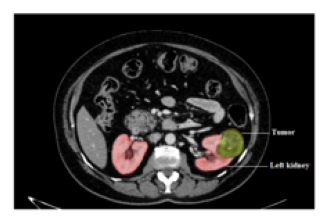

In [ ]:
image2 = PILImage.create('/content/kidney-example.png')
image2.thumbnail((224, 224))
image2.show()

In [ ]:
%%time
ensemble_prediction(image2)

CPU times: user 387 ms, sys: 6 ms, total: 393 ms
Wall time: 400 ms


('kidney_tumor',
 'all_benign : 0.0000\nall_early : 0.0000\nall_pre : 0.0002\nall_pro : 0.0014\nbrain_glioma : 0.0035\nbrain_menin : 0.0000\nbrain_tumor : 0.0002\nbreast_benign : 0.0008\nbreast_malignant : 0.0000\ncervix_dyk : 0.0012\ncervix_koc : 0.0000\ncervix_mep : 0.0001\ncervix_pab : 0.0000\ncervix_sfi : 0.0000\ncolon_aca : 0.0001\ncolon_bnt : 0.0000\nkidney_normal : 0.4897\nkidney_tumor : 0.5001\nlung_aca : 0.0000\nlung_bnt : 0.0000\nlung_scc : 0.0001\nlymph_cll : 0.0019\nlymph_fl : 0.0000\nlymph_mcl : 0.0003\noral_normal : 0.0001\noral_scc : 0.0002')

## Building a Gradio application interface:


In [ ]:
#|export

title = "CancerNet"
description = """A Machine Learning Approach to predict & classify cancer: \n
The project runs an ensemble arrangement of 2 Image models \n
1. vit_small_patch16_224 \n
2. vit_small_patch32_224  \n
Dataset consists of 8 Types of cancer: \n
a. Acute Lymphoblastic Leukemia, \n
b. Brain cancer, \n
c. Breast Cancer, \n
d. Cervical Cancer,  \n
e. Kidney Cancer, \n
f. Lung & colon cancer, \n
g. Lymphoma \n
h. Oral cancer \n"""
input_size = gr.Image(height=224, width=224)
outputs = ['text', 'text']
examples = ['brain_tumor.jpg', 'kidney-example.png', 'ALL_cancer.jpg', 'breast_cancer.jpg', 'Cervical_cancer.jpg',
            'colon_aca.jpg', 'oral_cancer.png', 'cervix_dyk.jpg']
#interpretation = "default"
#enable_queue = True

interface = gr.Interface(
    fn = ensemble_prediction,
    inputs = input_size,
    outputs = outputs,
    examples = examples,
    title = title,
    description = description
).launch(inline=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c16952813ef3ba102d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
